## Run the notebook

In [1]:
%run "C:\Users\ACER\OneDrive\Desktop\4eme\code\compter\Projet_multi_image_processing.ipynb"

## Load the image and pretreat it

1.51 -60


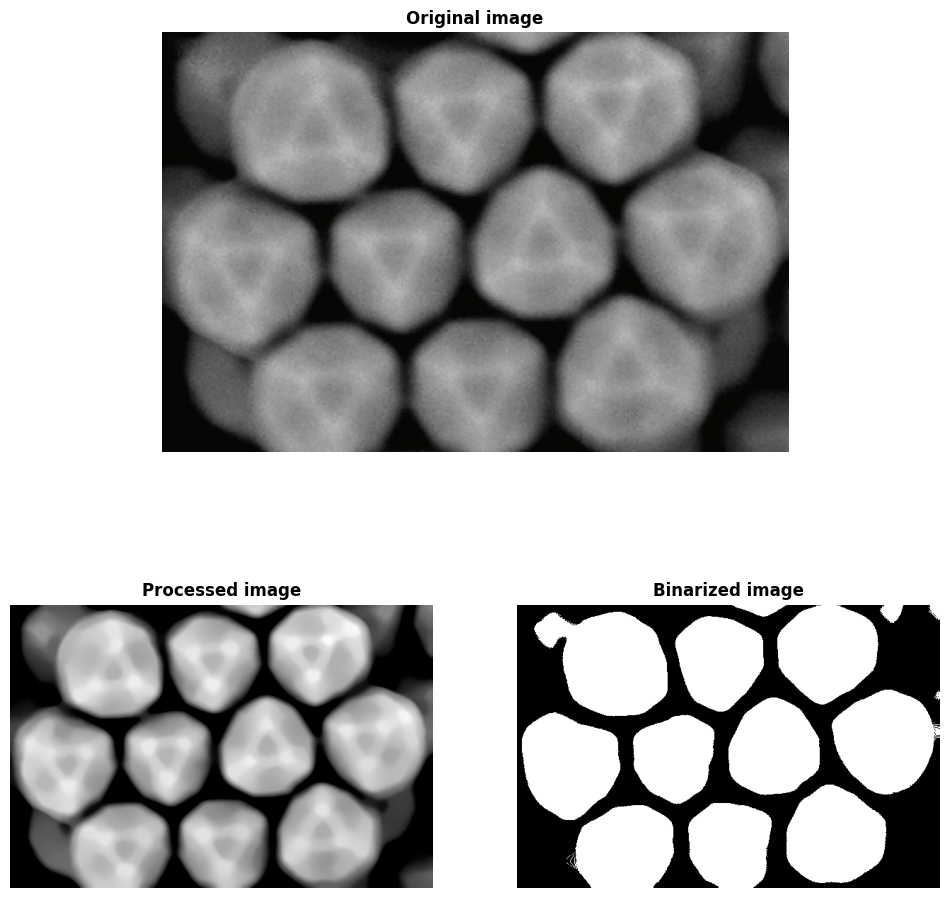

In [2]:
img = cv2.imread("icosa.jpg")
# img_treat,alpha,beta = image_treatmentl ("nano_cube_internet.jpg", inverse_color = True,
#                                         kernel_morpho = 3,
#                                         open_iter=1,
#                                         close_iter=3,
#                                         clear_bder = False,
#                                         )

img_treat,alpha,beta = image_treatment_manuel ("icosa.jpg", inverse_color = False,
                                        kernel_morpho = 3,
                                        open_iter=0,
                                        close_iter=0,
                                        clear_bder = False,
                                        alpha = 1.51, beta = -60
                                          )
print(alpha,beta)

## Watershed the image

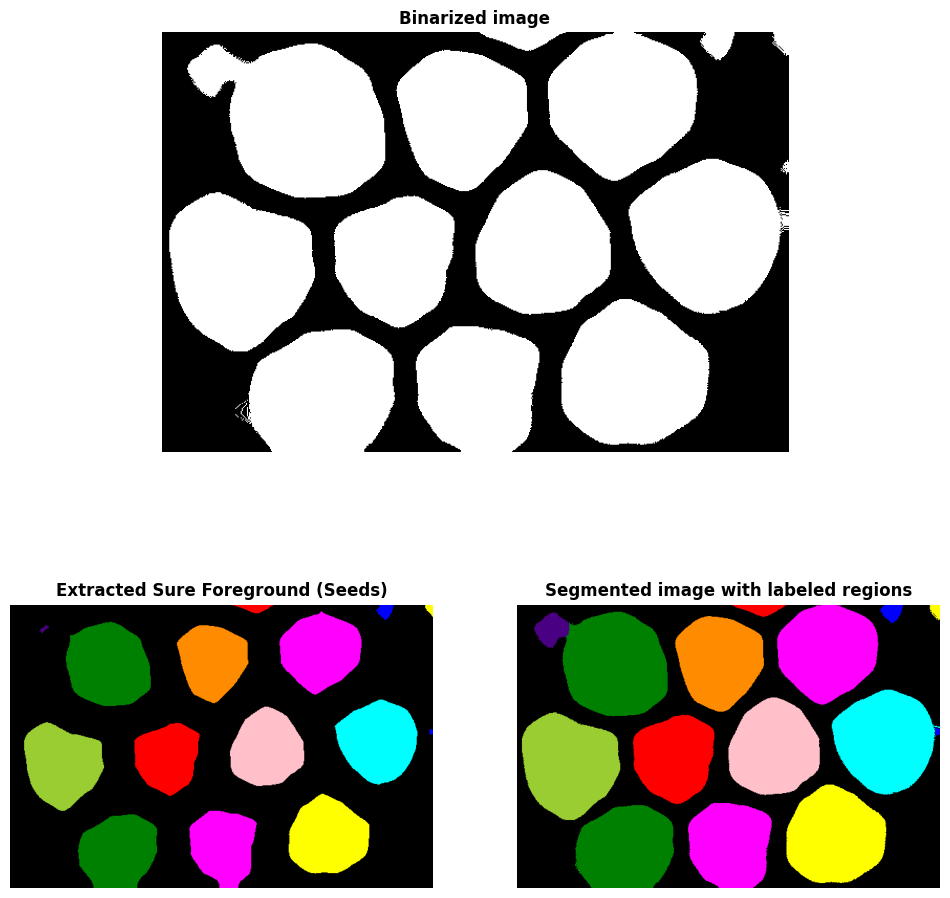

In [3]:
labels_ws = NP_segmentation_fg_bg(img_treat, dist_max_threshold = 0.2,erode_iter=1,open_iter=1,kernel_size = 3)

## Load the wanted model

In [5]:
model = tf.keras.models.load_model('C:/Users/ACER/OneDrive/Desktop/4eme/projet_multi/models/Model_256x256x1_IMGDB_8_classes.h5')

C:\Users\ACER\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### **** The warning doesn't matter much in this example but in some case the model could be totally refreshed

## Classify the label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[0.01065348 0.02518105 0.06097727 0.00551773 0.01075167 0.06255189
  0.02430123 0.8000657 ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[9.9981922e-01 9.9283061e-05 6.8991120e-08 8.5906883e-08 8.0299811e-05
  1.0343859e-06 4.0025667e-09 2.8911677e-09]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[9.9209422e-01 1.8698476e-05 9.2117043e-05 4.1405706e-06 5.5150152e-03
  5.6467447e-06 1.9964939e-03 2.7371547e-04]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[9.9951100e-01 9.2008181e-12 1.1200531e-07 1.5207535e-11 4.8887072e-04
  3.4350270e-12 4.4754053e-12 4.9128739e-11]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[9.9999034e-01 1.5614282e-14 1.0145976e-11 3.7590818e-15 9.7136463e-06
  6.8650453e-16 1.0105827e-14 1.0185835e-12]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[[9.5050901e-01 7.6019009e-13 1.2063523e-05 4.6878328e-11 4.9479008e-02
  2.5164237e-12 5.4334405e-11 8.4466375e-12]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[3.6045137e-01 1.8091605e-08 3.2047927e-05 7.918

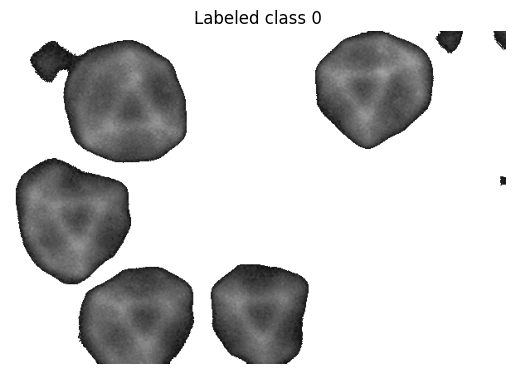

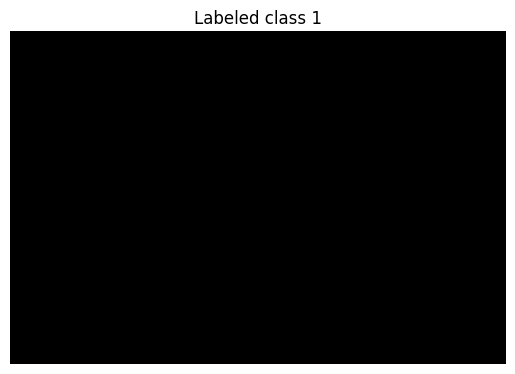

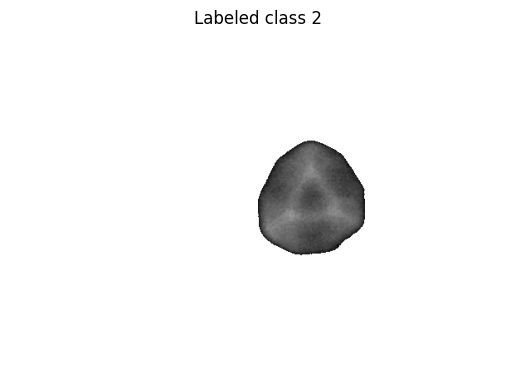

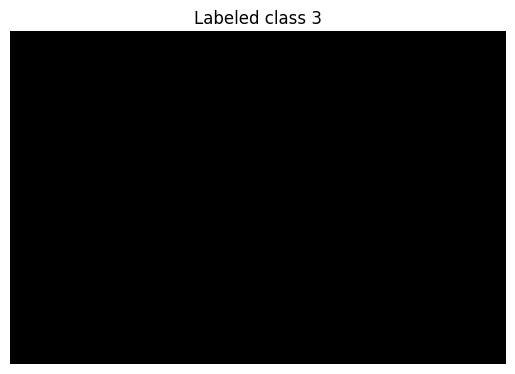

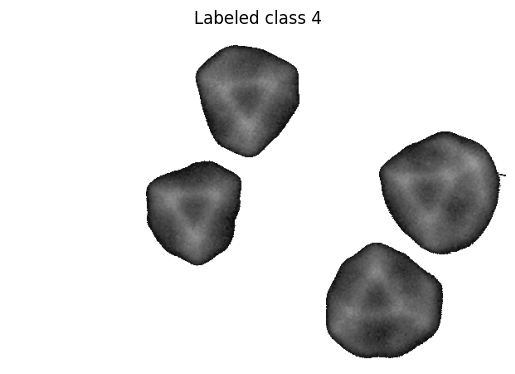

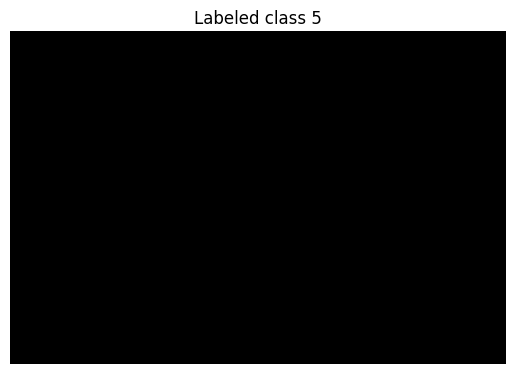

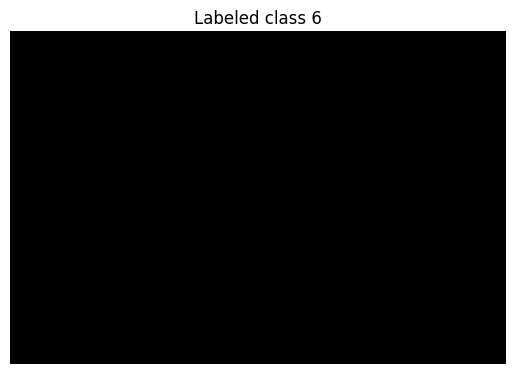

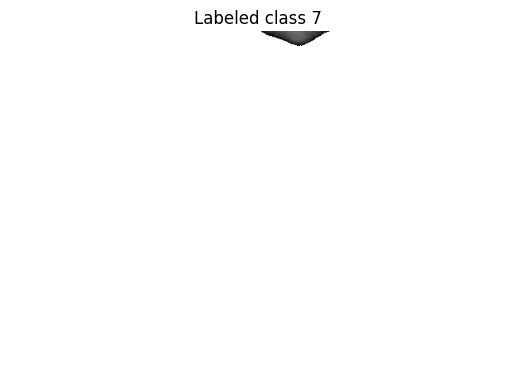

In [6]:
extracted_labels = Classification(img,model,8,labels_ws,target_size=(256,256),color_mode='L',black_bg_color = True)

## Scale bar ratio

#### * Random scale bar image in this example

<Figure size 640x480 with 0 Axes>

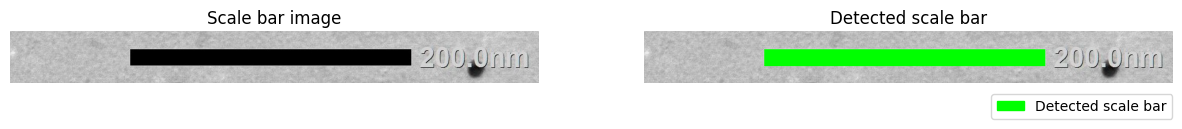

In [7]:
pixel_to_nm = detect_scale_bar("80nmAuNP_007_scale_bar.jpg",200)

## Plot the class size histogram and Gaussian fit

#### * The Gaussiant fit won't work in this example because the number of sample frequency is too big

1


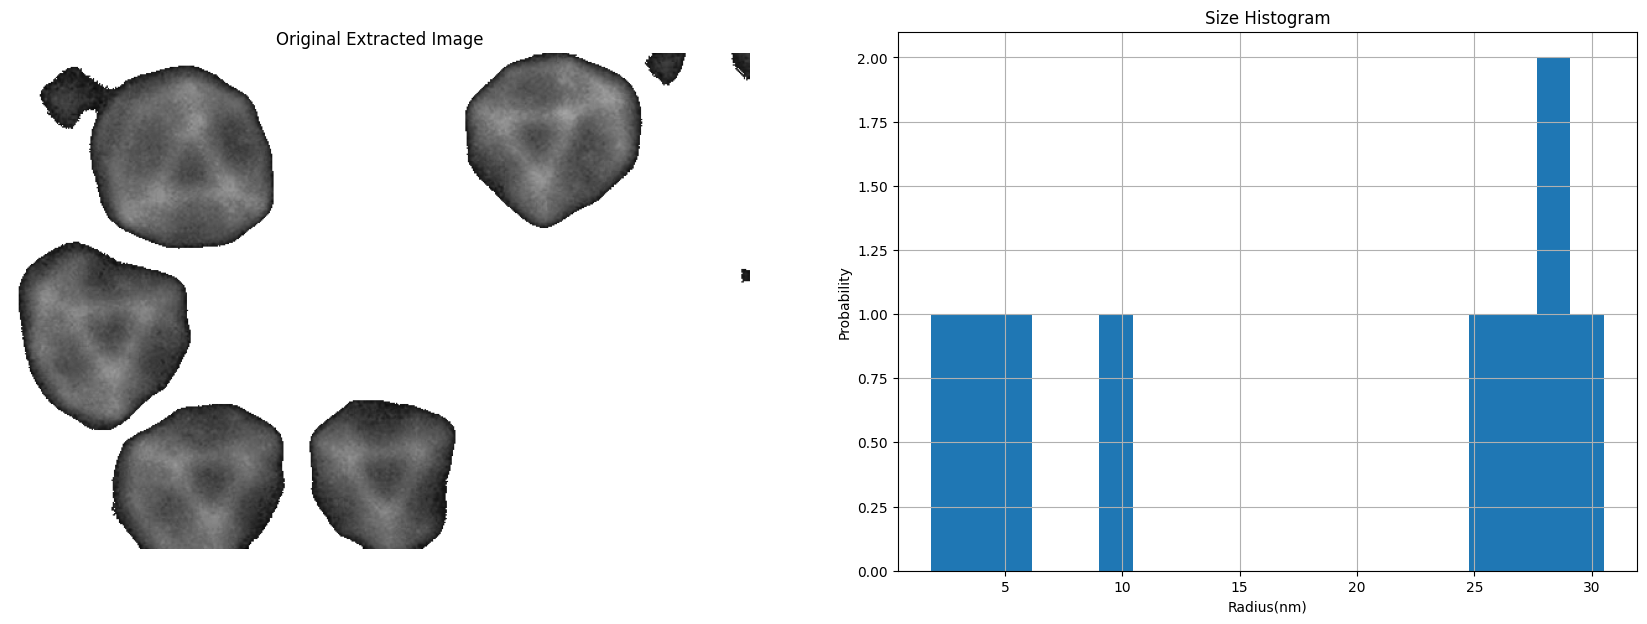

In [8]:
# i = Selected class to extract its label
i = 0
ICO = extracted_labels[i]
# pixel_to_nm extracted
ICO_size = size_histogram(ICO, pixel_to_nm=pixel_to_nm, name_img="icosa.jpg",bins = 20)
# plot_Gaussian_fit(ICO_size,bins=4)

## Xplique

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
[[3.5514152e-01 7.4233452e-04 1.2012691e-03 7.9870428e-04 6.4178830e-01
  3.0880681e-05 8.0940139e-05 2.1605643e-04]]


<Figure size 640x480 with 0 Axes>

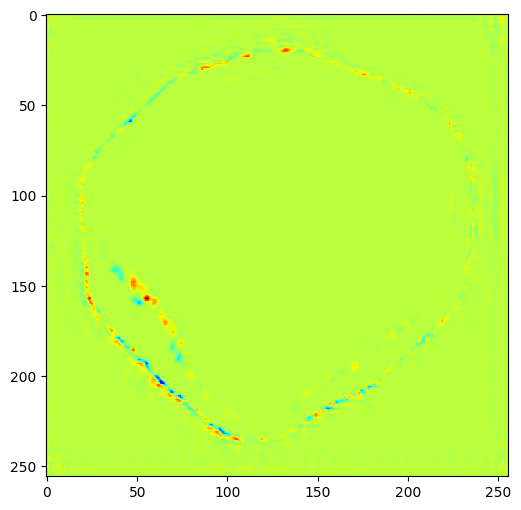

<Figure size 640x480 with 0 Axes>

In [87]:
# extract object labeled by 4
ext = extract_np(4,img, labels_ws,black_bg_color = False)
r,ext = testing_image(ext,model)
show_xplique(model,ext,0,8,1,GradientInput)